# Analysis of the parsed data from the site Avtoelon.uz

## We need to find:

1) How many car brands are there on the site and show only top-10 of them on the diagram;

2) How many regions are there in Uzbekistan, including cities. Show top-10 selling of them;

3) How many ads are in cities and in regions separatly, show it in diagrams;

4) What car is the most popular in top-10 cities and regions separatly, show it on diagrams;

5) What are average prices of all cars in every city and region;

6) What is the average price of top-10 most popular cars in cities and regions separatly.

7) How top-3 cars behave

------------------------------------------------------------------------------------------

### First of all let's import libraries which we would need:

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'

<strong>Now we want to open open our CSV file with complete parsed data (relevant at November 13th)</strong>

In [2]:
advertsDF = pd.read_csv('list.csv') #advertsDF is our table with info
advertsDF

,id,brand,name,year,price,Город,"Объем двигателя, л",Кузов,Пробег,Коробка передач,Цвет,Привод,Есть доставка
0,1214637,Daewoo,Nexia,2010,5974,Денау,1.5 (газ-бензин),седан,71000.0,механика,белый,передний привод,NaN
1,1216327,Chevrolet,"Tracker,",2019,19000,Ташкент,1.8 (бензин),кроссовер,14000.0,автомат,белый,передний привод,Да
2,1084744,Chevrolet,"Malibu,",2012,12000,Ташкент,2.4 (бензин),седан,119800.0,механика,бежевый,передний привод,NaN
3,1216263,Chevrolet,"Nexia 3,",2020,4800,Самарканд,1.5 (бензин),седан,5000.0,автомат,белый,передний привод,Да
4,1183835,BMW,X5,2006,22000,Фергана,3 (бензин),внедорожник,102000.0,типтроник,черный,полный привод,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19990,1193235,Chevrolet,Damas,2020,7800,Ташкент,NaN,микровэн,NaN,механика,белый,задний привод,NaN
19991,1193233,Chevrolet,"Matiz,",2008,3700,Андижан,0.8 (газ-бензин),хэтчбек,138000.0,механика,серебристый,передний привод,NaN
19992,1193182,Chevrolet,"Nexia 2,",2008,4700,Ургенч,1.5 (газ-бензин),седан,NaN,механика,NaN,передний привод,NaN
19993,1095162,Daewoo,Nexia,2005,4800,Бухара,1.5 (газ-бензин),седан,163000.0,механика,NaN,NaN,NaN


<strong>We see that we have 19,995 adverts and some information about them.</strong>

------------------------------------------------------------------------------------------

### On the site you can promote your ad so it always could be on the top of the page. So we need to get rid of these duplicates

In [3]:
advertsDF = advertsDF.drop_duplicates() 
advertsDF

,id,brand,name,year,price,Город,"Объем двигателя, л",Кузов,Пробег,Коробка передач,Цвет,Привод,Есть доставка
0,1214637,Daewoo,Nexia,2010,5974,Денау,1.5 (газ-бензин),седан,71000.0,механика,белый,передний привод,NaN
1,1216327,Chevrolet,"Tracker,",2019,19000,Ташкент,1.8 (бензин),кроссовер,14000.0,автомат,белый,передний привод,Да
2,1084744,Chevrolet,"Malibu,",2012,12000,Ташкент,2.4 (бензин),седан,119800.0,механика,бежевый,передний привод,NaN
3,1216263,Chevrolet,"Nexia 3,",2020,4800,Самарканд,1.5 (бензин),седан,5000.0,автомат,белый,передний привод,Да
4,1183835,BMW,X5,2006,22000,Фергана,3 (бензин),внедорожник,102000.0,типтроник,черный,полный привод,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19990,1193235,Chevrolet,Damas,2020,7800,Ташкент,NaN,микровэн,NaN,механика,белый,задний привод,NaN
19991,1193233,Chevrolet,"Matiz,",2008,3700,Андижан,0.8 (газ-бензин),хэтчбек,138000.0,механика,серебристый,передний привод,NaN
19992,1193182,Chevrolet,"Nexia 2,",2008,4700,Ургенч,1.5 (газ-бензин),седан,NaN,механика,NaN,передний привод,NaN
19993,1095162,Daewoo,Nexia,2005,4800,Бухара,1.5 (газ-бензин),седан,163000.0,механика,NaN,NaN,NaN


<strong>Voila, we got pure data, it's 19,859 rows</strong>

------------------------------------------------------------------------------------------

## 1) How many car brands are there on the site and show only top-10 of them on a diagram

In [6]:
brands = pd.unique(advertsDF['brand']) #we extract only brands column from the table
print(f"The number of brands: {len(brands)}" ) 
print("They are:")
print(*brands, sep=', ')

The number of brands: 82
They are:
Daewoo, Chevrolet, BMW, Ravon, ВАЗ (Lada), Mercedes-Benz, Toyota, Lexus, Hyundai, Changan, Kia, Haval, ГАЗ, Isuzu, Ford, Москвич, УАЗ, Honda, ЛуАЗ, Mazda, Opel, Nissan, Foton, ЗАЗ, Tofas, Peugeot, Audi, ИЖ, Volkswagen, SsangYong, Hafei, Land Rover, Ferrari, РАФ, СМЗ, Mitsubishi, JAC, Volvo, Fiat, Brilliance, Geely, Lincoln, Dong Feng, Ретро-автомобили, Citroen, Jeep, Skoda, Pontiac, Xpeng, Iveco, Tesla, Mini, ВИС, ARO, BAW, Cadillac, FAW, Leopard, Great Wall, Infiniti, Plymouth, Renault, Chrysler, Porsche, Maserati, Seat, NIO, Smart, Dodge, Rolls-Royce, Zastava, Lifan, Renault Samsung, Rover, King Long, Saab, Arcfox, Dacia, Alfa Romeo, Eagle, Huanghai, Jaguar


In [4]:
brands = advertsDF['brand'].value_counts() #counting each brand  
brands = brands[:10] #getting only top 10 of them
brands

Chevrolet        9987
ВАЗ (Lada)       3543
Daewoo           2723
ГАЗ               705
Москвич           414
Mercedes-Benz     410
Hyundai           287
Ravon             265
Kia               203
Toyota            141
Name: brand, dtype: int64

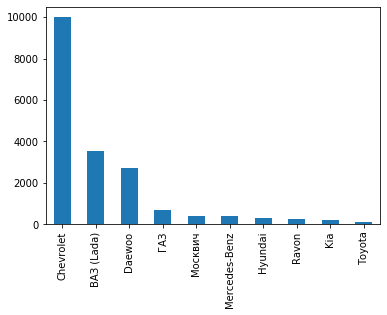

In [5]:
brands.plot.bar() #plotting above brand counts as bar graph
plt.show()

------------------------------------------------------------------------------------------

## 2) How many regions are there in Uzbekistan, including cities

In [6]:
cities = pd.unique(advertsDF['Город']) # extract only city column from our table
print(f"The number of regions and cities: {len(cities)}")
print("They are:")
print(*cities, sep=', ')

The number of regions and cities: 201
They are:
Денау, Ташкент, Самарканд, Фергана, Шурчинский район, Турткульский район, Ангорский район, Алмалык, Андижан, Наманган, Нуратинский район, Бухара, Хазараспский район, Джизак, Коканд, Карши, Ургенч, Яккабагский район, Навои, Термез, Гулистан, Чирчик, Шахриханский район, Кибрайский район, Ургутский район, Шахрисабз, Шафирканский район, Янгиюль, Кувинский район, Асакинский район, Бахмальский район, Зарафшан, Джаркурганский район, Избасканский район, Гиждуванский район, Янгиарыкский район, Термезский район, Нукус, Амударьинский район, Папский район, Бостанлыкский район, Каттакурганский район, Андижанский район, Ходжейлийский район, Бандиханский район, Тахиаташ, Булунгурский район, Ферганский район, Каган, Кургантепинский район, Сардобинский район, Кумкурганский район, Букинский район, Нарпайский район, Пайарыкский район, Янгибазарский район, Кошкупырский район, Гузарский район, Ангрен, Музрабадский район, Хивинский район, Карманинский район, Б

------------------------------------------------------------------------------------------

## 3) How many ads are in cities and in regions separatly, show it on diagrams

### Firstly let's separate regions and cities from the table 

In [7]:
only_cities = [ i for i in cities if "район" not in i ] #picking up only cities

print(f"The number of cities: {len(only_cities)}")
print("They are:")
print(*only_cities, sep=', ')


The number of cities: 38
They are:
Денау, Ташкент, Самарканд, Фергана, Алмалык, Андижан, Наманган, Бухара, Джизак, Коканд, Карши, Ургенч, Навои, Термез, Гулистан, Чирчик, Шахрисабз, Янгиюль, Зарафшан, Нукус, Тахиаташ, Каган, Ангрен, Беруни, Бекабад, Нурафшон, Гиждуван, Маргилан, Ахангаран, Кунград, г. Фергана, Сырдарья, Янгиер, Ширин, Чиназ, Ханабад, Кувасай, г. Ахангаран


In [8]:
only_regions = [ i for i in cities if "район" in i ] #picking up only regions

print(f"The number of regions: {len(only_regions)}")
print("They are:")
print(*only_regions, sep=', ')


The number of regions: 163
They are:
Шурчинский район, Турткульский район, Ангорский район, Нуратинский район, Хазараспский район, Яккабагский район, Шахриханский район, Кибрайский район, Ургутский район, Шафирканский район, Кувинский район, Асакинский район, Бахмальский район, Джаркурганский район, Избасканский район, Гиждуванский район, Янгиарыкский район, Термезский район, Амударьинский район, Папский район, Бостанлыкский район, Каттакурганский район, Андижанский район, Ходжейлийский район, Бандиханский район, Булунгурский район, Ферганский район, Кургантепинский район, Сардобинский район, Кумкурганский район, Букинский район, Нарпайский район, Пайарыкский район, Янгибазарский район, Кошкупырский район, Гузарский район, Музрабадский район, Хивинский район, Карманинский район, Чимбайский район, Гурленский район, Узунский район, Алтынсайский район, Багатский район, Китабский район, Касбийский район, Учкудукский район, Шерабадский район, Ургенчский район, Бешарыкский район, Кушрабатски

### Now let's make two separate tables with cities and regions:

In [9]:
citiesDF = advertsDF[advertsDF['Город'].str.contains("район") == False] # made new table with adverts only from cities

In [10]:
citiesDF

,id,brand,name,year,price,Город,"Объем двигателя, л",Кузов,Пробег,Коробка передач,Цвет,Привод,Есть доставка
0,1214637,Daewoo,Nexia,2010,5974,Денау,1.5 (газ-бензин),седан,71000.0,механика,белый,передний привод,NaN
1,1216327,Chevrolet,"Tracker,",2019,19000,Ташкент,1.8 (бензин),кроссовер,14000.0,автомат,белый,передний привод,Да
2,1084744,Chevrolet,"Malibu,",2012,12000,Ташкент,2.4 (бензин),седан,119800.0,механика,бежевый,передний привод,NaN
3,1216263,Chevrolet,"Nexia 3,",2020,4800,Самарканд,1.5 (бензин),седан,5000.0,автомат,белый,передний привод,Да
4,1183835,BMW,X5,2006,22000,Фергана,3 (бензин),внедорожник,102000.0,типтроник,черный,полный привод,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19989,1052453,Daewoo,Damas,1994,2300,Бухара,NaN,микровэн,NaN,механика,NaN,NaN,NaN
19990,1193235,Chevrolet,Damas,2020,7800,Ташкент,NaN,микровэн,NaN,механика,белый,задний привод,NaN
19991,1193233,Chevrolet,"Matiz,",2008,3700,Андижан,0.8 (газ-бензин),хэтчбек,138000.0,механика,серебристый,передний привод,NaN
19992,1193182,Chevrolet,"Nexia 2,",2008,4700,Ургенч,1.5 (газ-бензин),седан,NaN,механика,NaN,передний привод,NaN


### As we can see there are 16,277 adverts in cities and ...

In [11]:
regionsDF = advertsDF[advertsDF['Город'].str.contains("район") == True] # made new table with adverts only from regions

In [12]:
regionsDF

,id,brand,name,year,price,Город,"Объем двигателя, л",Кузов,Пробег,Коробка передач,Цвет,Привод,Есть доставка
6,1209895,Chevrolet,Damas,2020,7850,Шурчинский район,NaN,микровэн,232.0,механика,белый,задний привод,NaN
10,1141782,ВАЗ (Lada),2102,1978,2409,Турткульский район,1.7 (газ-бензин),универсал,NaN,механика,белый,задний привод,NaN
11,1149881,Chevrolet,"Malibu,",2019,26000,Ангорский район,2.4 (бензин),седан,10400.0,автомат,белый,передний привод,NaN
28,1096720,Chevrolet,"Cobalt,",2013,7420,Нуратинский район,1.5 (бензин),седан,136000.0,механика,сахара,передний привод,NaN
33,1212087,Chevrolet,"Malibu,",2012,14000,Хазараспский район,2.4 (газ-бензин),седан,98.0,механика,хамелеон,передний привод,Да
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19954,1208215,Daewoo,Nexia,1999,3473,Зааминский район,NaN,седан,555000.0,механика,серый,передний привод,NaN
19964,874577,ВАЗ (Lada),2102,1972,2800,Паркентский район,NaN,NaN,NaN,механика,белый,NaN,NaN
19982,1158777,ВАЗ (Lada),Vesta,2019,11576,Узунский район,1.6 (бензин),седан,31000.0,робот,белый,передний привод,NaN
19987,1158771,ВАЗ (Lada),Самара 2 (седан 2115),2008,2900,Бекабадский район,NaN,NaN,NaN,механика,NaN,NaN,NaN


### ...3,582 in regions

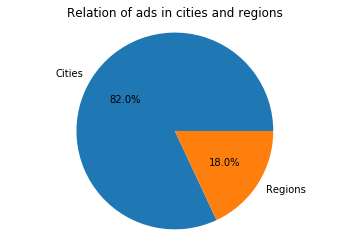

In [14]:
labels = ['Cities', 'Regions']
sizes = [len(citiesDF), len(regionsDF)]

# constructing pie chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%') #fillting with label names and values
ax.axis('equal') 
ax.set_title('Relation of ads in cities and regions') #setting title for pie chart
plt.show() #showing drawn chart

------------------------------------------------------------------------------------------

## 4) What car is the most popular in top-10 cities and regions separatly, show it on diagrams;

 тут можно показать какая машина самая популярная в 10 топ городах и регионах и показать на графике. Тут ниже пример какой график можно сделать

In [17]:
citiesValueCounts = citiesDF['Город'].value_counts() #how many ads in each city
citiesValueCounts = citiesValueCounts[:10] #getting top 10 cities
citiesValueCounts

Ташкент      5841
Самарканд    1987
Бухара       1305
Наманган      902
Фергана       798
Карши         652
Джизак        640
Навои         575
Андижан       522
Ургенч        497
Name: Город, dtype: int64

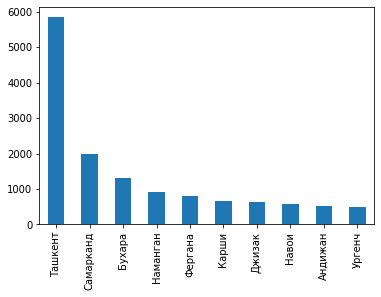

In [18]:
citiesValueCounts.plot.bar() #plotting top 10 cities counts as bar graph
plt.show()

In [19]:
cityBrands = citiesDF['brand'].value_counts() #top-10 brands in cities
cityBrands = cityBrands[:10]
cityBrands

Chevrolet        8496
ВАЗ (Lada)       2723
Daewoo           2045
ГАЗ               546
Mercedes-Benz     364
Москвич           283
Hyundai           267
Ravon             237
Kia               182
Toyota            131
Name: brand, dtype: int64

In [20]:
regionsAds = regionsDF['Город'].value_counts() #how many ads in top-30 regions
regionsAds = regionsAds[:30]

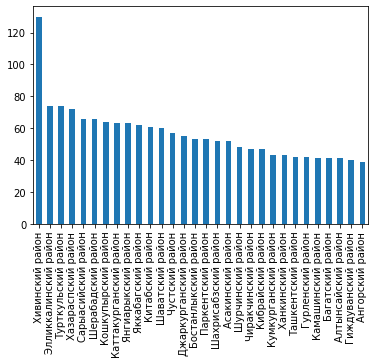

In [21]:
regionsAds.plot.bar()
plt.show()

In [22]:
regionBrands = regionsDF['brand'].value_counts() #top-10 brands in regions
regionBrands = regionBrands[:10]
regionBrands

Chevrolet        1491
ВАЗ (Lada)        820
Daewoo            678
ГАЗ               159
Москвич           131
Mercedes-Benz      46
УАЗ                38
Ravon              28
Ford               24
Kia                21
Name: brand, dtype: int64

------------------------------------------------------------------------------------------

## 5) What are average prices of all cars in every city and region;

In [24]:
cityPriceDF = citiesDF[['price', 'Город']] #splitting columns Price and City from the whole table
avgValue = cityPriceDF.groupby(['Город']).mean() #grouping table by City
avgValue.sort_values('price', ascending=False) #sorting groupped table in descending order

,price
Город,
Гиждуван,12307.090909
Ташкент,10264.697826
Андижан,7641.636015
Нурафшон,7495.263158
Термез,7192.381503
Ургенч,7133.555332
Карши,6995.470859
Кунград,6978.454545
Самарканд,6932.204831


In [25]:
regionPriceDF = regionsDF[['price', 'Город']] #splitting columns Price and Region from the whole table 
avgValue = regionPriceDF.groupby(['Город']).mean() #grouping table by Region
avgValue.sort_values('price', ascending=False) #sorting groupped table in descending order

,price
Город,
Чиназский район,28440.750000
Навбахорский район,11250.823529
Куштепенский район,10000.000000
Чустский район,9453.350877
Наманганский район,9214.833333
...,...
Шараф-Рашидовский район,2072.000000
Кегейлийский район,2051.375000
Бойсунский район,2000.000000


------------------------------------------------------------------------------------------

## 6) What is the average price of top-10 most popular cars in cities and regions separatly.

In [26]:
topBrands = citiesDF['brand'].value_counts()[:10] #top-10 brands in cities
topBrands

Chevrolet        8496
ВАЗ (Lada)       2723
Daewoo           2045
ГАЗ               546
Mercedes-Benz     364
Москвич           283
Hyundai           267
Ravon             237
Kia               182
Toyota            131
Name: brand, dtype: int64

In [58]:
cityTop = citiesDF[['brand', 'price']] #splitting brand and price columns from whole table
avgValue = cityTop.groupby(['brand']).mean() #grouping by brand and getting average value
avgValue = avgValue.sort_values("price",ascending=False) #sorting average vaues in descending order
avgValue

,price
brand,
Ferrari,200000.000000
Maserati,92500.000000
Porsche,87000.000000
NIO,71788.000000
Tesla,69048.300000
...,...
РАФ,2168.333333
ИЖ,1785.764706
ЛуАЗ,1613.250000


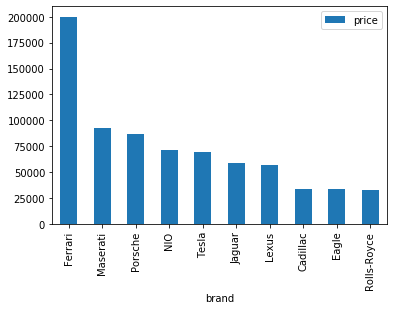

In [59]:
avgValue[:10].plot.bar() #showing top 10 average value

In [60]:
topBrands = regionsDF['brand'].value_counts()[:10] #top-10 brands in regions
topBrands

Chevrolet        1491
ВАЗ (Lada)        820
Daewoo            678
ГАЗ               159
Москвич           131
Mercedes-Benz      46
УАЗ                38
Ravon              28
Ford               24
Kia                21
Name: brand, dtype: int64

In [63]:
regionTop = regionsDF[['brand', 'price']] #splitting brand and price columns from whole table
avgValue = regionTop.groupby(['brand']).mean() #grouping by brand and getting average value
avgValue = avgValue.sort_values("price",ascending=False) #sorting average vaues in descending order

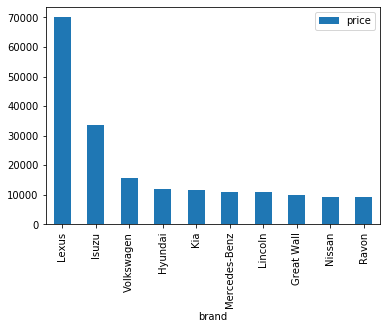

In [64]:
avgValue[:10].plot.bar()  #showing top 10 average value

------------------------------------------------------------------------------------------

## 7) How top-3 cars behave

In [77]:
brandPriceDF = advertsDF[['brand', 'price']]  #splitting brand and price from whole table
avgValue = brandPriceDF.groupby(['brand']).mean() #grouping by brand
avgValue = avgValue.sort_values('price', ascending=False) #sorting in descending order
avgValue

,price
brand,
Ferrari,200000.000000
Maserati,92500.000000
Porsche,87000.000000
NIO,71788.000000
Tesla,69048.300000
...,...
ARO,1945.500000
ИЖ,1760.947368
ЛуАЗ,1702.000000


In [78]:
brandsSorted = avgValue.index.values #getting sorted brands names
resultChevrolet = np.where(brandsSorted == 'Chevrolet')[0][0] #getting index of Chevrolet from brands
resultLada = np.where(brandsSorted == 'ВАЗ (Lada)')[0][0] #getting index of Chevrolet from brands
resultDaewoo = np.where(brandsSorted == 'Daewoo')[0][0] #getting index of Daewoo from brands
print("Chevrolet  - place: ", resultChevrolet, " avgPrice: ", avgValue.iloc[resultChevrolet][0]) #printing index and average value of Chevrolet
print("ВАЗ (Lada) - place: ", resultLada, " avgPrice: ", avgValue.iloc[resultLada][0]) #printing index and average value of ВАЗ (Lada)
print("Daewoo     - place: ", resultDaewoo, " avgPrice: ", avgValue.iloc[resultDaewoo][0]) #printing index and average value of Daewoo

Chevrolet  - place:  45  avgPrice:  8561.489736657655
ВАЗ (Lada) - place:  67  avgPrice:  3279.1123341800735
Daewoo     - place:  62  avgPrice:  4121.283143591627


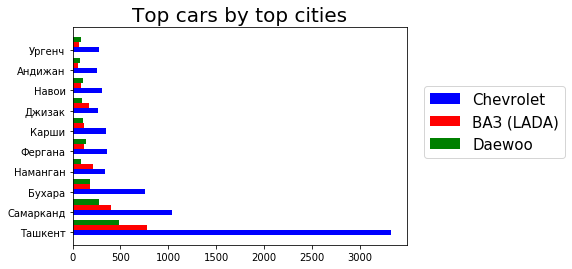

In [75]:
cities = citiesDF.groupby('Город') #grouping by cities
arr=[] #array for storing values of top-3 cars
for i in citiesValueCounts.keys().tolist(): #looping cities
    citiyBrands = cities.get_group(i)['brand'].tolist() #getting cars for city
    countChevrolet, countLada, countDaewoo = 0, 0, 0 #initialising result values for top-3 cars
    for j in citiyBrands: #looping brands
        if j == 'Chevrolet':
            countChevrolet = countChevrolet + 1 #if Chevrloet found then incrementing
        if j == 'ВАЗ (Lada)':
            countLada = countLada + 1 #if ВАЗ (Lada) found then incrementing
        if j == 'Daewoo':
            countDaewoo = countDaewoo + 1 #if Daewoo found then incrementing
    arr.append([countChevrolet, countLada, countDaewoo]) #storing values
    # now we have 10x3 matrix storing car adverts per city
    
#we need to reshape 10x3 to 3x10 matrix to visualize as diagram
result = [] #arrow for storing values of top-3 cars
for i in range(3): #looping top-3 cars
    temp = [] #temporary array to store value
    for j in arr: #looping previous array
        temp.append(j[i]) 
    result.append(temp)
    #here we have 10x3 array 

x = np.arange(10) #creating 10 items
citiesNames = citiesValueCounts.keys().tolist() #getting cities names 
plt.barh(x + 0.00, result[0], color = "b", height = 0.25, label = "Chevrolet") #drawing Chevrolet value 
plt.barh(x + 0.25, result[1], color = "r", height = 0.25, label = "ВАЗ (LADA)") #drawing ВАЗ (LADA) value
plt.barh(x + 0.5, result[2], color = "g", height = 0.25, label = "Daewoo") #drawing Daewoo value
plt.title("Top cars by top cities", fontsize = 20) #setting title for diagram
plt.yticks(x, citiesNames) #setting cities names
plt.legend(fontsize = 15, loc = (1.05, 0.4)) #configurong diagram with size
plt.show() #showing diagram

In [3]:
pd.read_csv('list.csv').to_csv('modified.csv', index=False, sep=';')

NameError: name 'pd' is not defined

------------------------------------------------------------------------------------------